<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Investigacion_Operativa/Cadenas_de_Markov_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

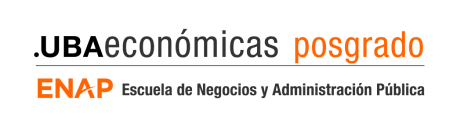

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Técnicas de Investigación Operativa para la Gestión - Cadenas de Markov

- María José BIANCO
- Verónica María GARCIA FRONTI
- Roberto Darío BACHINI

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


#### Instalando paquetes

In [2]:
install.packages("markovchain")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘matlab’, ‘expm’, ‘RcppParallel’, ‘RcppArmadillo’




In [3]:
install.packages("diagram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘shape’




#### Habilitando librerias

In [5]:
library(markovchain)
library(shape)
library(diagram)

In [7]:
estados <- c("Grand Food", "Mi Super")
MatrizTrans <- matrix(c(0.90,0.10,
                        0.20,0.80),
                        byrow = T, ncol=2)

In [8]:
colnames(MatrizTrans)=rownames(MatrizTrans)=estados

#### Matriz de Transición

In [9]:
MatrizTrans

,Grand Food,Mi Super
Grand Food,0.9,0.1
Mi Super,0.2,0.8


#### Objeto Markovchain

In [11]:
CuotaMercado <- new("markovchain", transitionMatrix = MatrizTrans)
CuotaMercado

Unnamed Markov chain 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Grand Food, Mi Super 
 The transition matrix  (by rows)  is defined as follows: 
           Grand Food Mi Super
Grand Food        0.9      0.1
Mi Super          0.2      0.8


#### Diagrama de Transición

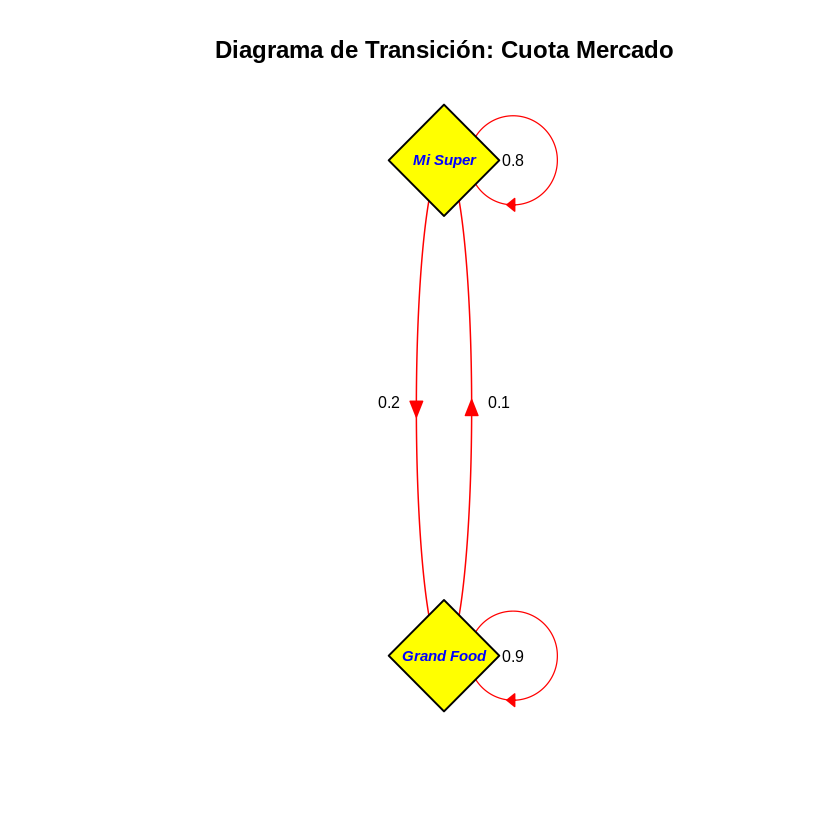

In [20]:
plotmat(t(CuotaMercado@transitionMatrix),
        box.type = "diamond", shadow.size = 0, txt.col = "blue", txt.font = 4,
        box.lwd = 1.55, box.size = 0.08, box.col = "yellow", box.cex = 0.75,
        arr.col = "red", arr.width = 0.2, arr.length = 0.25,
        arr.type ="triangle", arr.lwd = 1.2, arr.lcol = "red",
        cex.txt = 0.8, curve = 0.05,
        self.cex = 0.8,
        self.shiftx = c(0.10, 0.10),
        self.shifty = c(+0.00, +0.00),
        self.arrpos = c(1.5*pi, 1.5*pi, 0.5*pi),
        main = "Diagrama de Transición: Cuota Mercado", cex = 1.2)

#### Transición en dos y ocho pasos

In [25]:
(P2=CuotaMercado^2)
(P8=CuotaMercado^8)

Unnamed Markov chain^2 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Grand Food, Mi Super 
 The transition matrix  (by rows)  is defined as follows: 
           Grand Food Mi Super
Grand Food       0.83     0.17
Mi Super         0.34     0.66


Unnamed Markov chain^8 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Grand Food, Mi Super 
 The transition matrix  (by rows)  is defined as follows: 
           Grand Food  Mi Super
Grand Food  0.6858827 0.3141173
Mi Super    0.6282347 0.3717653


In [31]:
Estado0 = c(1000,0)
Estado2 = Estado0 * P2

In [32]:
(Estado2 = Estado0 %*% P2@transitionMatrix)
(Estado8 = Estado0 %*% P8@transitionMatrix)

Grand Food,Mi Super
830,170


Grand Food,Mi Super
685.8827,314.1173


#### Análisis de Largo Plazo: distribución estacionaria

In [33]:
CuotaMercado
CuotaMercado^2
CuotaMercado^8
CuotaMercado^40

Unnamed Markov chain 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Grand Food, Mi Super 
 The transition matrix  (by rows)  is defined as follows: 
           Grand Food Mi Super
Grand Food        0.9      0.1
Mi Super          0.2      0.8


Unnamed Markov chain^2 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Grand Food, Mi Super 
 The transition matrix  (by rows)  is defined as follows: 
           Grand Food Mi Super
Grand Food       0.83     0.17
Mi Super         0.34     0.66


Unnamed Markov chain^8 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Grand Food, Mi Super 
 The transition matrix  (by rows)  is defined as follows: 
           Grand Food  Mi Super
Grand Food  0.6858827 0.3141173
Mi Super    0.6282347 0.3717653


Unnamed Markov chain^40 
 A  2 - dimensional discrete Markov Chain defined by the following states: 
 Grand Food, Mi Super 
 The transition matrix  (by rows)  is defined as follows: 
           Grand Food  Mi Super
Grand Food  0.6666669 0.3333331
Mi Super    0.6666662 0.3333338


In [34]:
(DistribucionEstacionaria = steadyStates(CuotaMercado))

Grand Food,Mi Super
0.6666667,0.3333333


#### Grafico 30 transiciones

In [44]:
EstadoInicial = c(1,0)
GranFood = c()
MiSuper = c()
n = 30

In [45]:
for(k in 1:n){
  paso = EstadoInicial*CuotaMercado^k
  GranFood[k] <- paso[1,1]
  MiSuper[k] <- paso[1,2]
}

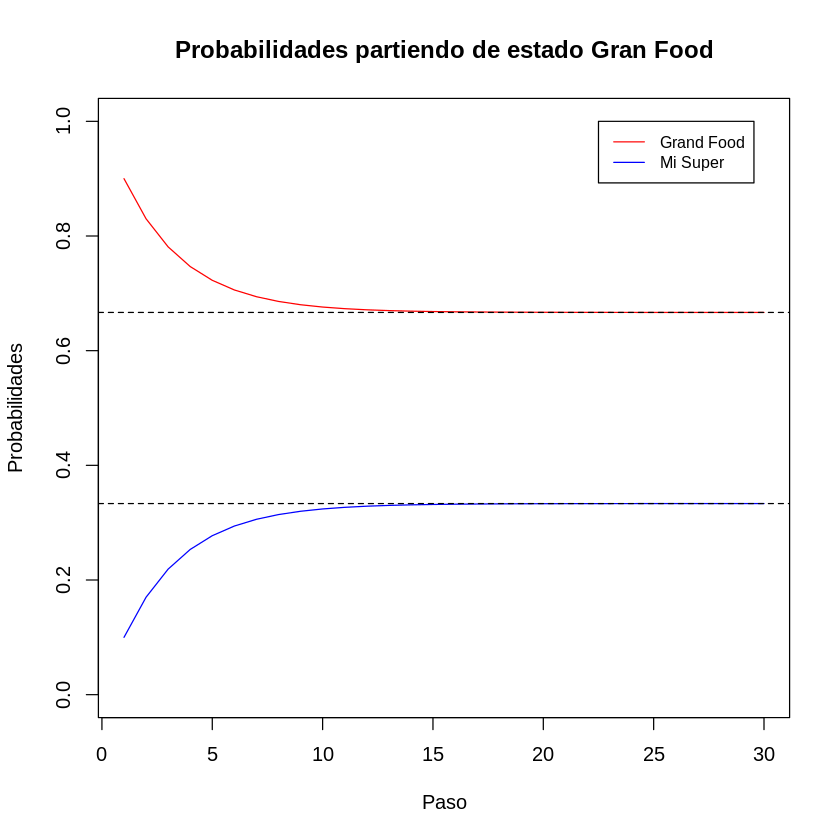

In [55]:
plot(GranFood, col="red", ylim = c(0,1), type ="l", ylab = "Probabilidades",
  xlab = "Paso", main = "Probabilidades partiendo de estado Gran Food")
lines(MiSuper, col="blue", type="l")
abline(h=steadyStates(CuotaMercado)[1], lty = 2)
abline(h=steadyStates(CuotaMercado)[2], lty = 2)
legend(n*0.75,1,legend = estados, col=c("red","blue"),lty = 1, cex = 0.8)